In [178]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [179]:
# load df, convert year to date/time and view
df = pd.read_csv("540_project_df.csv", parse_dates=['year'])
df.head()

,race,sex,year,salary_no,num_none,std_none,salary_hs,num_hs,std_hs,salary_2yr,num_2yr,std_2yr,salary_4yr,num_4yr,std_4yr,salary_6yr,num_6yr,std_6yr
0,white,Male,2018-01-01,32458.0,6098.00,838.00,47199.0,19815.00,625.00,54482.0,18546.00,847.00,87842.0,16080.00,1263.00,125533.0,8516.00,2358.00
1,white,Male,2017-01-01,32096.0,6277.00,649.00,46284.0,19933.00,528.00,51974.0,18724.00,538.00,83478.0,15913.00,837.00,122160.0,8373.00,1892.00
2,white,Male,2016-01-01,33153.0,6255.00,883.00,45390.0,19941.00,546.00,50063.0,18951.00,510.00,84069.0,15136.00,961.00,116854.0,8211.00,1734.00
3,white,Male,2015-01-01,31336.0,6755.00,748.00,43711.0,19807.00,472.00,47900.0,18905.00,454.00,82495.0,14884.00,1005.00,115094.0,8257.00,1708.00
4,white,Male,2014-01-01,30342.0,6858.00,780.00,41492.0,19815.00,381.00,48405.0,18518.00,562.00,78348.0,14409.00,886.00,112351.0,7864.00,1706.00


In [188]:
# Only show year from datetime
df['year'] = pd.DatetimeIndex(df['year']).year

In [189]:
# subset features
shortdf = df[['race', 'sex', 'year', 'salary_no', 'salary_hs', 'salary_2yr',
                 'salary_4yr', 'salary_6yr']]
shortdf

,race,sex,year,salary_no,salary_hs,salary_2yr,salary_4yr,salary_6yr
0,white,Male,2018,32458.0,47199.0,54482.0,87842.0,125533.0
1,white,Male,2017,32096.0,46284.0,51974.0,83478.0,122160.0
2,white,Male,2016,33153.0,45390.0,50063.0,84069.0,116854.0
3,white,Male,2015,31336.0,43711.0,47900.0,82495.0,115094.0
4,white,Male,2014,30342.0,41492.0,48405.0,78348.0,112351.0
...,...,...,...,...,...,...,...,...
289,Hispanic,Female,1979,4675.0,6708.0,7069.0,9168.0,13313.0
290,Hispanic,Female,1978,4135.0,5834.0,6686.0,9684.0,10908.0
291,Hispanic,Female,1977,3707.0,5466.0,5588.0,9082.0,10569.0
292,Hispanic,Female,1976,3537.0,5124.0,5075.0,6884.0,9218.0


In [190]:
# rename features
shortdf = shortdf.rename(columns={"salary_no": "no_deg", "salary_hs": "hs_deg",
                        "salary_2yr": "2yr_deg", "salary_4yr": "4yr_deg",
                        "salary_6yr": "6yr_deg"})

In [191]:
# check for duplicates
duplicate = shortdf[shortdf.duplicated(keep = 'last')]
print('There are',len(duplicate),'duplicated rows')

There are 0 duplicated rows


In [192]:
# check for null values
shortdf.isnull().values.any()

False

In [196]:
# group subset data by annual mean incomes
yr_degree = shortdf.groupby('year').mean()
yr_degree.head()

,no_deg,hs_deg,2yr_deg,4yr_deg,6yr_deg
year,,,,,
1975,5590.400000,7325.400000,7611.200000,10665.200000,13872.8
1976,6060.400000,7906.200000,7894.400000,11407.400000,14976.4
1977,6402.000000,8633.000000,8793.200000,12704.000000,15945.4
1978,7045.600000,9270.600000,9871.800000,14181.400000,17146.4
1979,7081.666667,9432.833333,10240.333333,14477.833333,18422.5


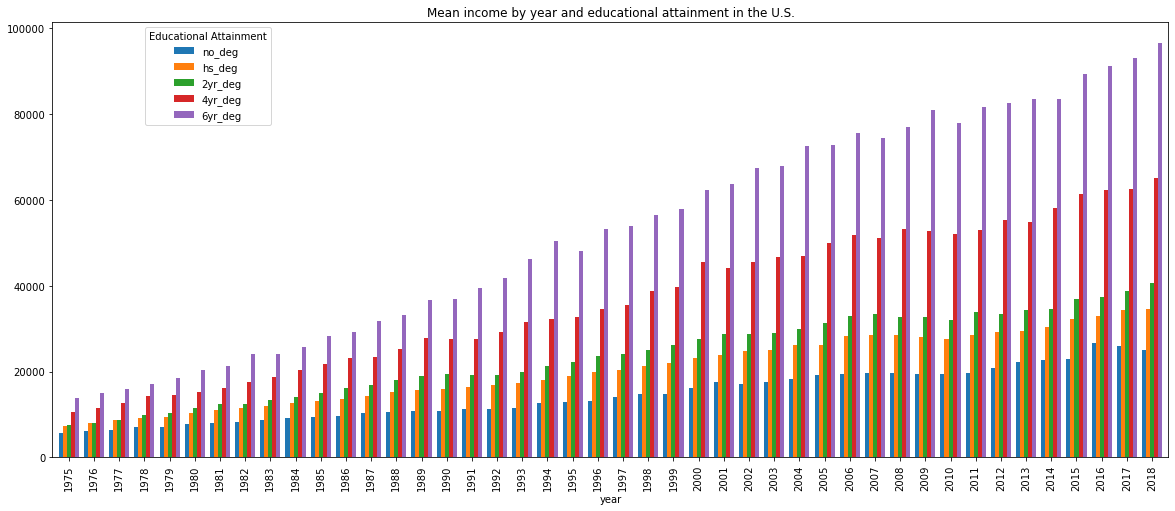

In [213]:
# plot bar graph showing income by education each year
yr_degree.plot(kind='bar', width=0.8, figsize=(20,8),
               title='Mean income by year and educational attainment in the U.S.').legend(title='Educational Attainment',
                                                                                          bbox_to_anchor=(0.2, 1))

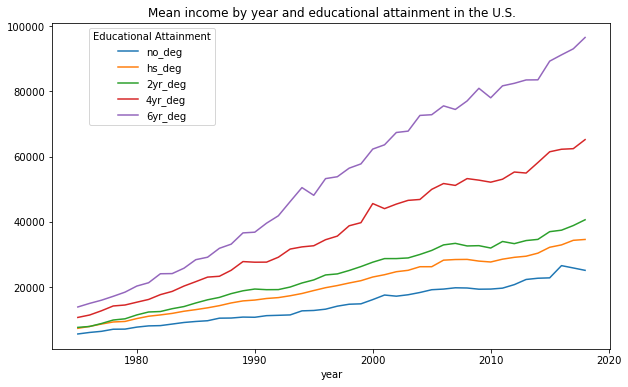

In [212]:
# plot line graph showing income by education each year
yr_degree.plot(figsize=(10,6),
               title='Mean income by year and educational attainment in the U.S.').legend(title='Educational Attainment',
                                                                                          bbox_to_anchor=(0.3, 1))